# Отток клиентов из фитнес-клуба

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 
Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. Необходимо провести анализ и подготовить план действий по удержанию клиентов.

## Содержание

### [1. Загрузка данных](#1)
### [2. Исследовательский анализ](#2)
* [2.1 Изучим данные](#2.1)
* [2.2 Найдем средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.](#2.2)
* [2.3 Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).](#2.3)
* [2.4 Рассчитаем матрицу корреляций.](#2.4)
* [ВЫВОДЫ](#2c)

### [3. Модель прогнозирования оттока клиентов](#3)
* [3.1 Разделим данные на обучающую и валидационную выборку в соотношении 80:20, а также проведем стандартизацию признаков.](#3.1)
* [3.2 Обучим модель на train-выборке логистической регрессией.](#3.2)
* [3.3 Обучим модель на train-выборке случайным лесом.](#3.3)
* [3.4 Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.](#3.4)
* [ВЫВОДЫ](#3c)

### [4. Кластеризация клиентов](#4)
* [4.1 Стандартизируем данные](#4.1)
* [4.2 Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.](#4.2)
* [4.3 Обучим модель кластеризации на основании алгоритма K-Means с 5ю кластерами.](#4.3)
* [4.4 Посмотрим средние значения признаков для каждоко кластера.](#4.4)
* [4.5 Построим распределения признаков для кластеров.](#4.5)
* [4.6 Посчитаем долю оттока для каждого кластера.](#4.6)

### [Итоговые выводы](#5c)



<a id='1'></a>

## 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id='2'></a>

# 2. Исследовательский анализ

<a id='2.1'></a>

### 2.1 Изучим данные

In [3]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Портрет среднестатистического клиента
Среднестатистическим клиентом является мужчина или женщита в возрасте 29 лет, живет недалеко от фитнес-клуба и посещает его два раза в неделю, суммарная выручка фитнес-центра от других услуг по которому равна 147 руб.

In [4]:
df.isna().mean()

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

Пропусков значений нет.

In [5]:
df.duplicated().sum()

0

Дубликатов нет.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Типы данных соответствуют их смыслу.

<a id='2.2'></a>

### 2.2  Найдем средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [7]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<a id='2.3'></a>

### 2.3 Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

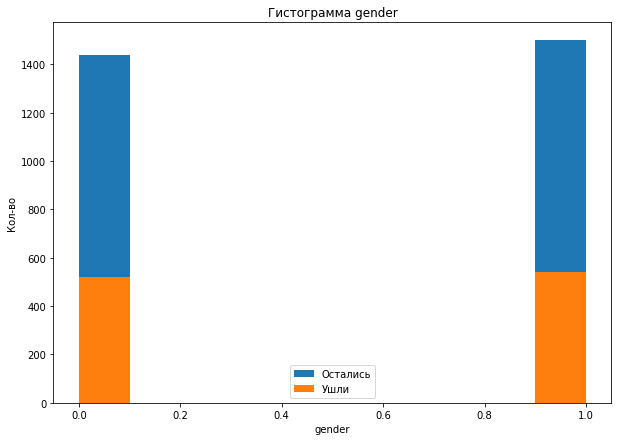

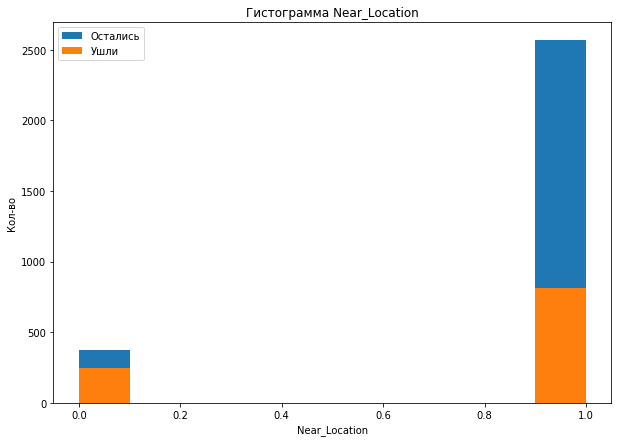

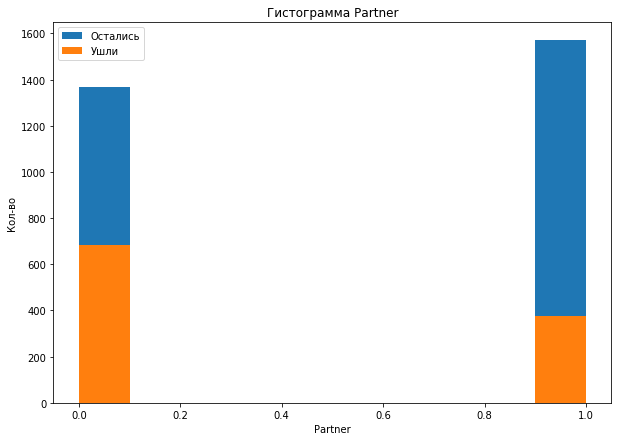

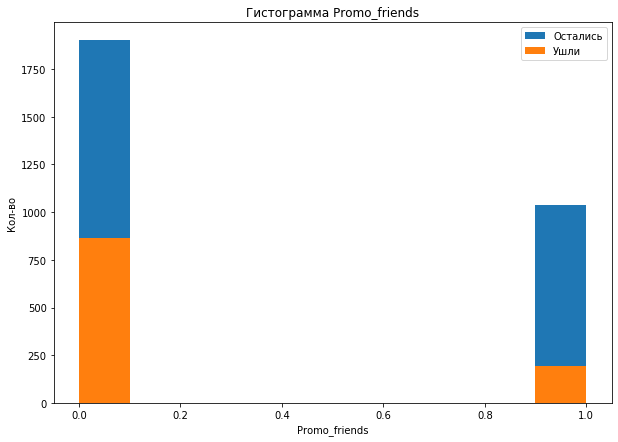

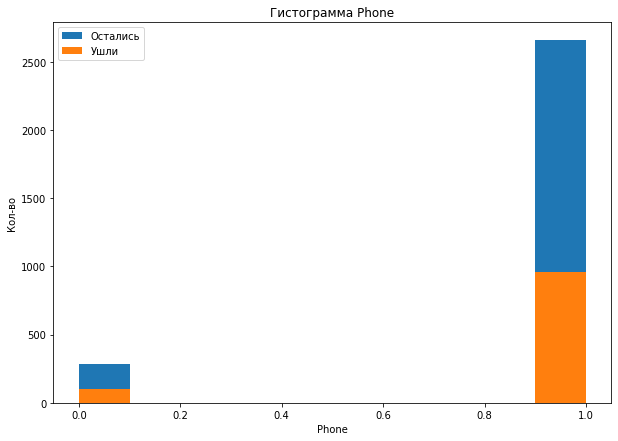

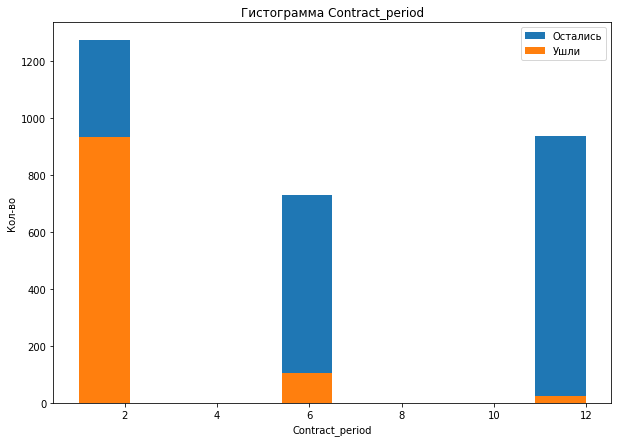

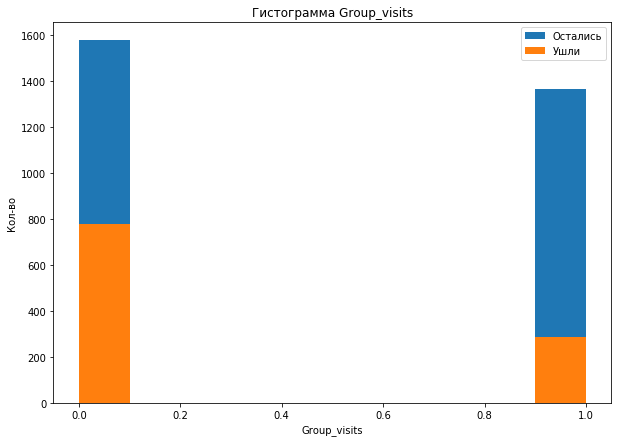

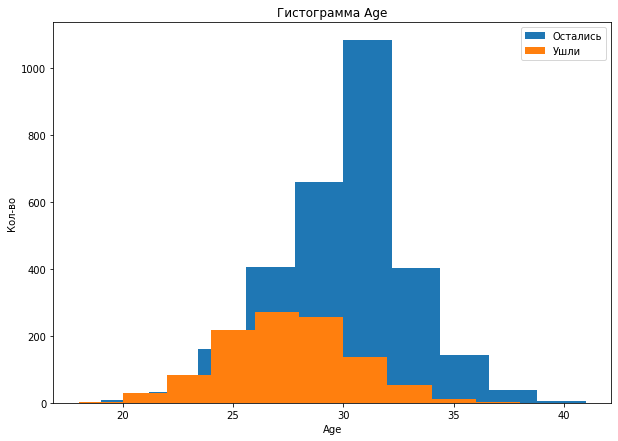

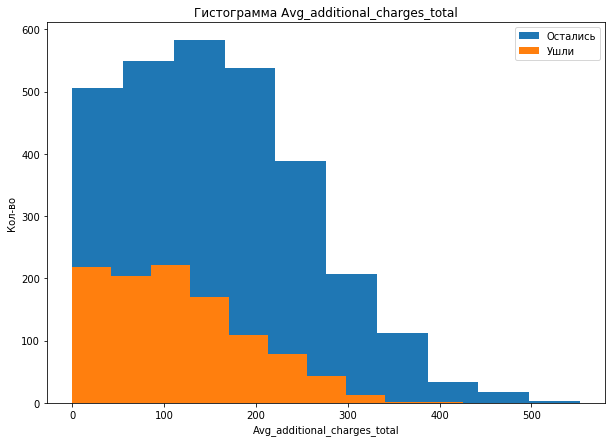

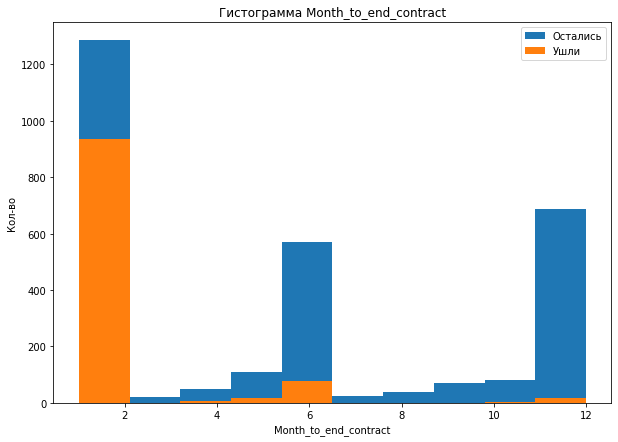

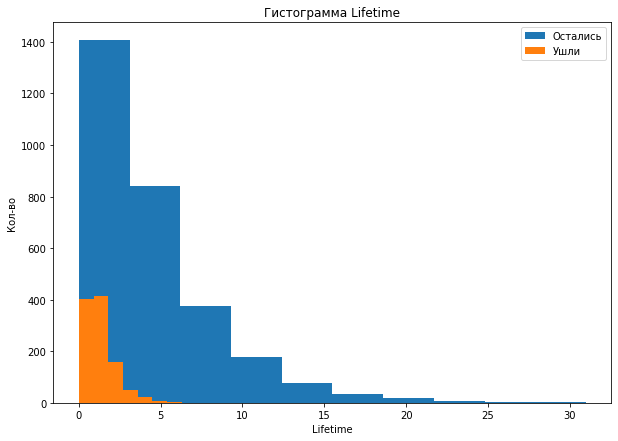

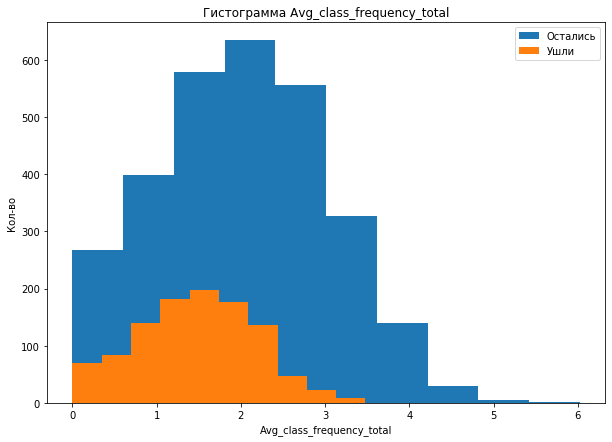

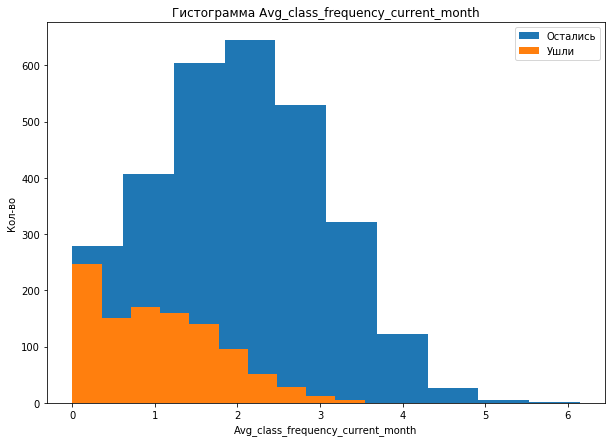

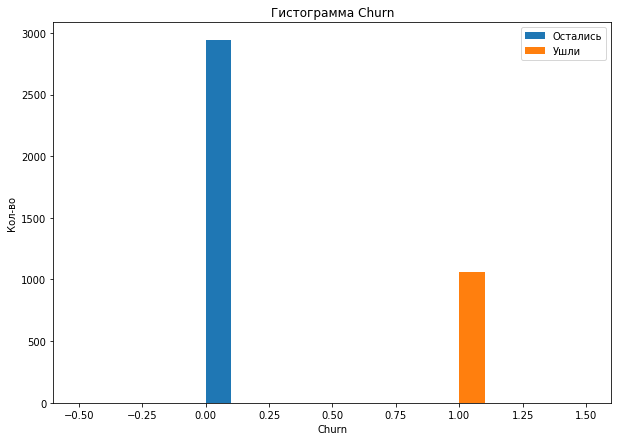

In [8]:
for col in df.columns:
    plt.figure(figsize=(10,7))
    
    plt.hist(df[df['Churn'] == 0][col], label='Остались')
    plt.hist(df[df['Churn'] == 1][col], label='Ушли')
    
    plt.legend()
    plt.ylabel('Кол-во')
    plt.xlabel(col)
    plt.title('Гистограмма {}'.format(col))
    plt.show()

<a id='2.4'></a>

### 2.4 Рассчитаем матрицу корреляций.

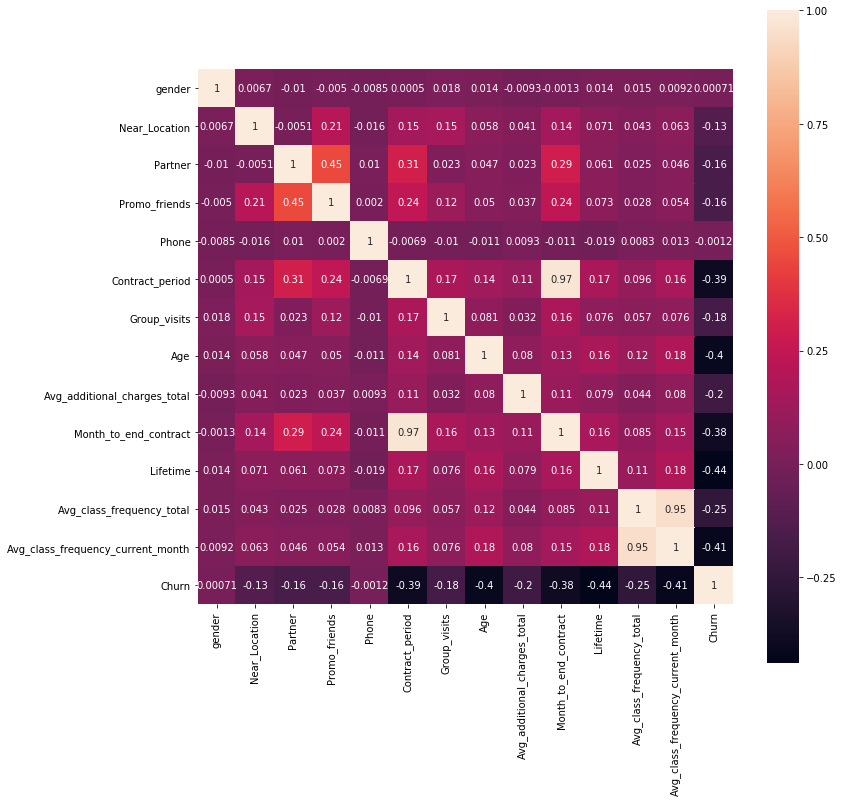

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, square=True)
plt.show()

<a id='2c'></a>

# 2. Выводы

### Данные
* Всего имеем 4000 зиписей
* Пропусков нет
* Дубликатов нет
* Типы данных соответствуют их смыслу
* У признаков сильно разные по величине стандартные отклонения поэтому перед обучением моделей признаки нужно стандартизировать.

### Признаки и отток
* gender - отток клиентов не зависит от пола;
* Near_Location - отток среди клиентов, которые живут далеко от фитнес-клуба в несколько раз выше, чем среди близживущих;
* Partner - отток среди клиентов, которые не являются сотрудниками компаний-партнеров в несколько раз выше, чем среди тех, которые являются сотрудниками компаний-партнеров;
* Promo_friends - отток среди клиентов записанных в рамках акции «приведи друга» существенно ниже, чем у клиентов записанных вне рамках этой акции;
* Phone - отток одинаковый вне зависимости оставил ли клиент свой номер телефона или нет;
* Contract_period - самый большой отток наблюдается среди клиентов с абонементом на 1 месяц, около 70%, для абонементов на 6 месячев отток существенно ниже, а самый маленький отток среди клиентов с абонементом на 12 месяцев;
* Group_visits - отток среди клиентов посещающих групповые занятия существенно выше, чем среди клиентов их не посещающих;
* Age - самый высокий отток принадлежит возрастной категории 25 лет, за месяц уходит больше, чем остается;
* Avg_additional_charges_total - характер распределения суммарной выручки от других услуг фитнес-центра (кафе, спорт-товары, косметический и массажный салон) не меняется в зависимости от того уйдет в следующем месяце клиент или нет;
* Month_to_end_contract, Lifetime - большая часть клиентов предпочитает абонементы на 1 месяц и среди них же наблюдается и самый высокий отток.

### Портрет среднестатистического клиента
Среднестатистическим клиентом является мужчина или женщита в возрасте 29 лет, живет недалеко от фитнес-клуба и посещает его два раза в неделю, суммарная выручка фитнес-центра от других услуг по которому равна 147 руб.

### Другие наблюдения
* По корреляции равной 0.97 между Month_to_end_contract и Contract_period, а также по гистограмме Month_to_end_contract видно, что в последний месяц у компании произошел всплеск продаж абонементов, что скорее всего связано с распродажей в месяц за который у нас данные;
* Корелляция между Avg_class_frequency_current_month и Avg_class_frequency_total составляет 0.95. По гистограммам этих признаков видим, что они практически совпадают.
* В следующий месяц за который мы имеем данные по 4000 клиентам 1000 из них ушли.




<a id='3'></a>

# 3. Модель прогнозирования оттока клиентов

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Посмотрим, как соотносятся классы набора данных.

In [11]:
df['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Неравенство размеров классов некритичное. Можно проводить обучение на имеющихся событиях без выравниявания размеров классов.

<a id='3.1'></a>

### 3.1 Разделим данные на обучающую и валидационную выборку в соотношении 80:20, а также проведем стандартизацию признаков.

Для начала разделим данные на признаки (матрица Х) и целевую переменную (у).

In [12]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

Разделим данные на обучающую и валидационную выборку, а также проведем стандартизацию признаков.

In [13]:
# Разделим данные на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

#Проведем стандартизацию признаков
# Обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<a id='3.2'></a>

### 3.2 Обучим модель на train-выборке логистической регрессией.

In [14]:
# зададим алгоритм для логистической регрессии
lr_model = LogisticRegression(solver='lbfgs')

# обучите модель
lr_model.fit(X_train_st, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)

<a id='3.3'></a>

### 3.3 Обучим модель на train-выборке случайным лесом.

In [15]:
# зададим алгоритм для случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)

<a id='3.4'></a>

### 3.4 Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

In [16]:
metrics = pd.DataFrame({'accuracy': [accuracy_score(y_test, lr_predictions), accuracy_score(y_test, rf_predictions)], 
                       'precision': [precision_score (y_test, lr_predictions), precision_score (y_test, rf_predictions)],
                       'recall': [recall_score (y_test, lr_predictions), recall_score (y_test, rf_predictions)]}, 
                      index=['LogisticRegression', 'RandomForestClassifier'])
metrics.round(3)

,accuracy,precision,recall
LogisticRegression,0.935,0.896,0.854
RandomForestClassifier,0.922,0.875,0.825


Таким образом модель на основе логистической регрессии имеет более высокие метрики и дает более точный прогноз. 

<a id='3c'></a>

# 3. Вывод
Из двух построенных моделей для прогнозирования оттока клиентов (Логистическая регрессия и Случайный лес) наилучшие результаты показала модель на основе логистической регрессии. 

<a id='4'></a>

# 4. Кластеризация клиентов

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

<a id='4.1'></a>

### 4.1 Стандартизируем данные 

In [18]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

<a id='4.2'></a>

### 4.2 Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

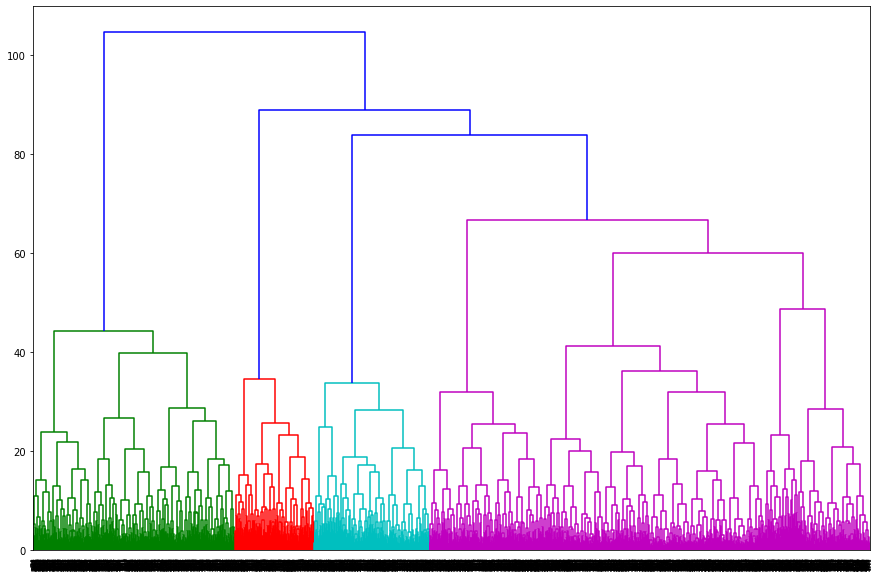

In [19]:
# Таблица «связок» между объектами
linked = linkage(X_sc, method = 'ward')

# Визуализация дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Исходя из полученной дендрограммы остановимся на 5 кластерах.

<a id='4.3'></a>

### 4.3 Обучим модель кластеризации на основании алгоритма K-Means с 5ю кластерами. 

In [20]:
# число кластеров - 5
km = KMeans(n_clusters = 5, random_state=0)

# вектор кластеров
labels = km.fit_predict(X_sc)

Допишем столбец с кластерами в df.

In [21]:
df['cluster'] = labels
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


<a id='4.4'></a>

### 4.4 Посмотрим средние значения признаков для каждоко кластера.

In [22]:
df.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Видим, что самый устойчивый к оттоку кластер номер 1. Основной его признак это абонемент на 12 мес.

#### Профиль среднестатистического клиента в каждом кластере
* 0 - Мужчина или женщина в возрасте 30 лет, живет недалеко от фитнес-клуба, сотрудник компании-партнера клуба, посещает его 2 раза в неделю, занимается 5 месяцев, имеет годовой абонемент;
* 1 - Мужчина или женщина в возрасте 29 лет, живет недалеко от фитнес-клуба, телефон неизвестен, посещает его 2 раза в неделю, занимается 4 месяца;
* 2 -  Мужчина или женщина в возрасте 28 лет, живет далеко от фитнес-клуба, первоначальная запись как правило была не по акции "приведи друга"  посещает его 1-2 раза в неделю, занимается 3 месяца;
* 3 - Мужчина или женщина в возрасте 28 лет, живет недалеко от фитнес-клуба, посещает его 1 раз в неделю, занимается 2-3 месяца;
* 4 - Мужчина или женщина в возрасте 30 лет, живет недалеко от фитнес-клуба, посещает его 3 раза в неделю, занимается 5 месяцев.

<a id='4.5'></a>

### 4.5 Построим распределения признаков для кластеров.

Для логических и дискретных признаков построим обычные столбчатые диаргаммы, а для непрерывных признаков построим боксплот. Для этого разделим их на две группы.

In [23]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn', 'cluster'],
      dtype='object')

In [24]:
# Группа признаков для которых будем строить столбчатые диаграммы
diagrams = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Churn']

# Группа признаков для которых будем строить боксплоты
box_plot = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

Построим столбчатые диаграммы для группы признаков diagrams.

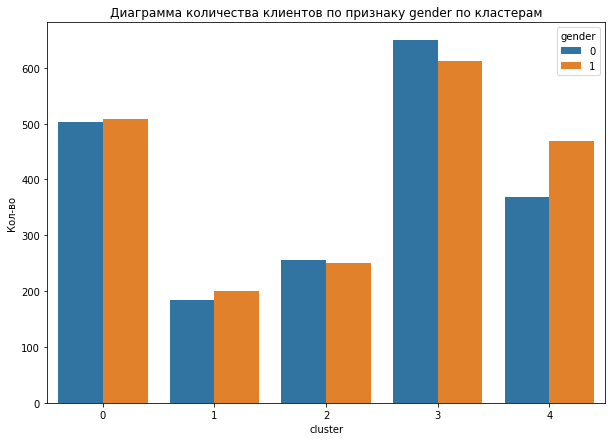

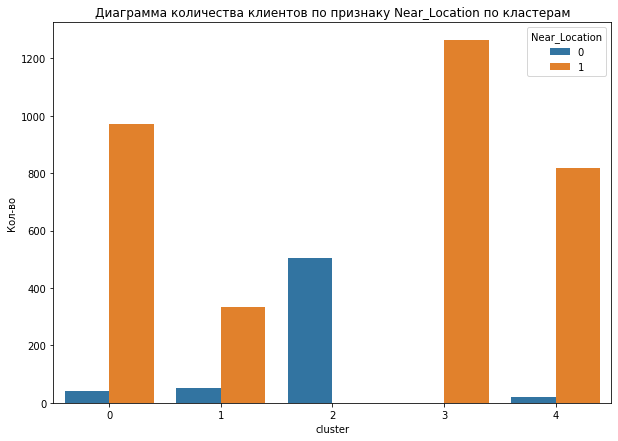

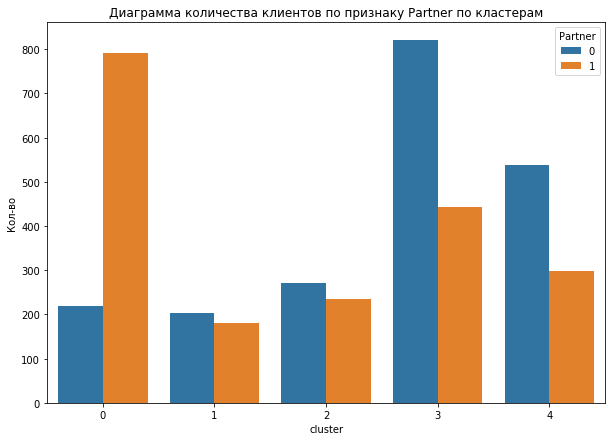

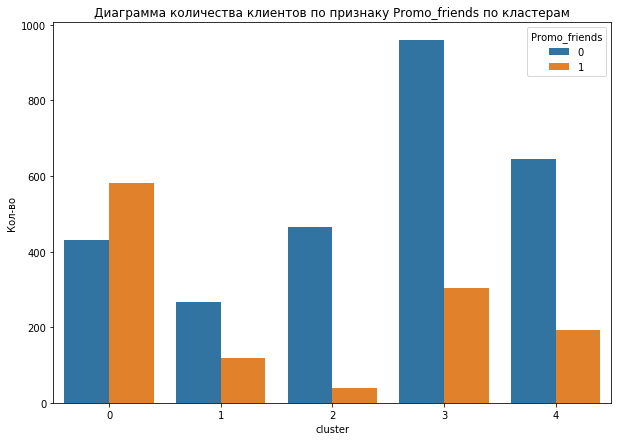

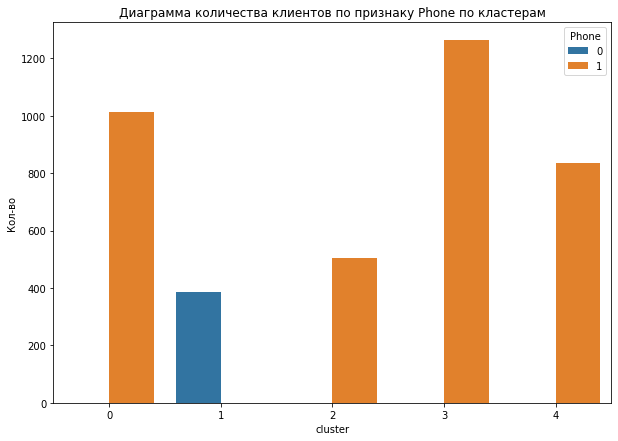

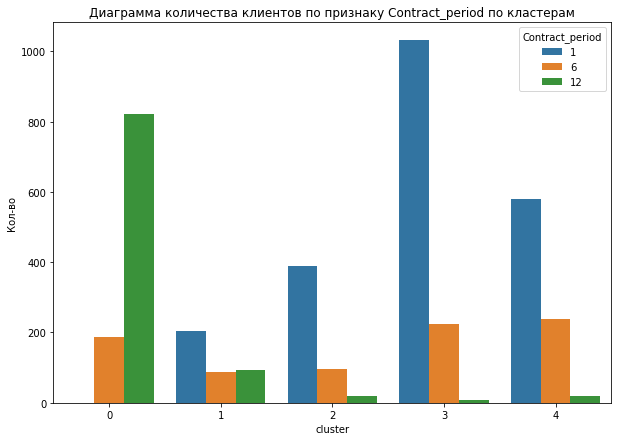

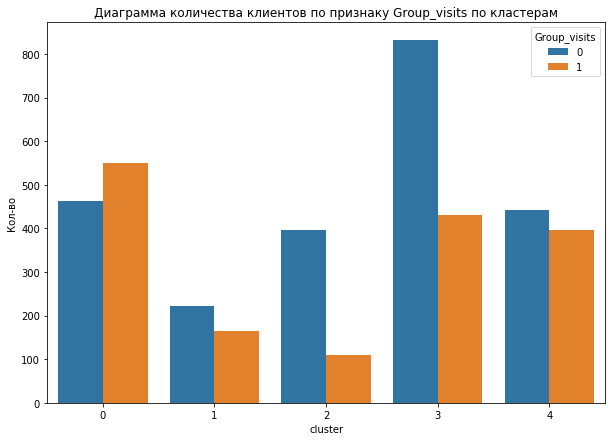

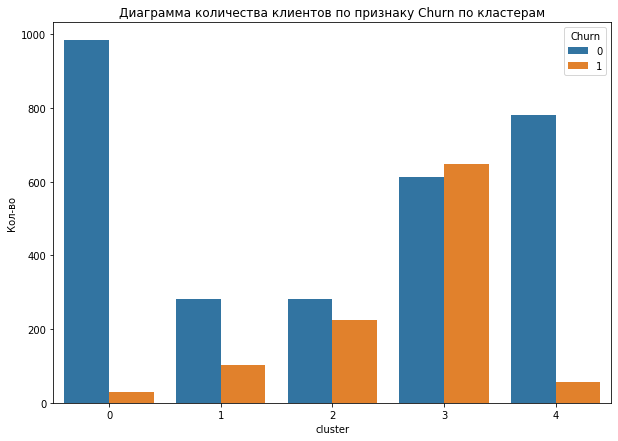

In [25]:
for element in diagrams:
    data = df.groupby(['cluster', element]).agg({element:'count'})

    data.columns = ['count']

    data.reset_index(inplace=True)


    plt.figure(figsize=(10,7))
    sns.barplot(x='cluster', y="count", hue=element, data=data)
    plt.ylabel('Кол-во')
    plt.title('Диаграмма количества клиентов по признаку {} по кластерам'.format(element))
    plt.show()

Построим боксплоты для группы признаков box_plot.

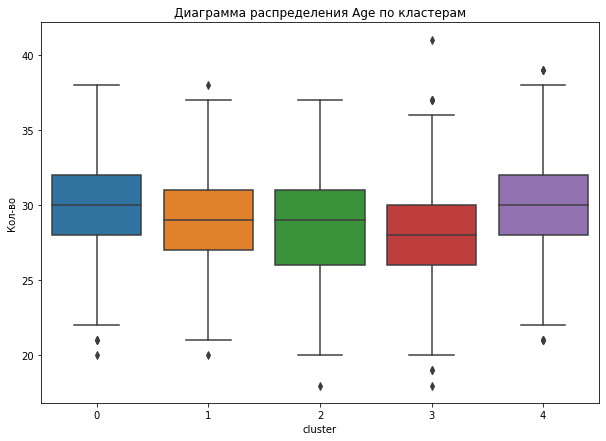

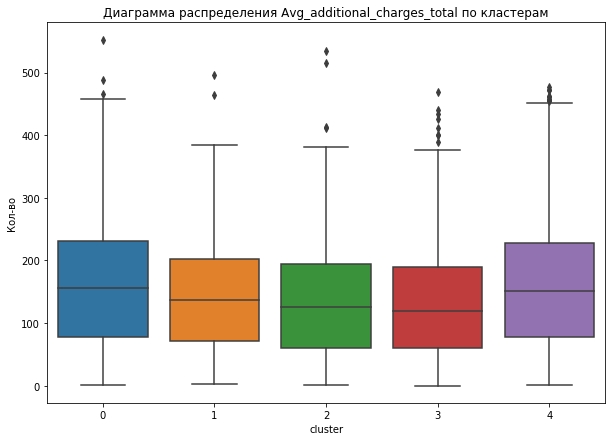

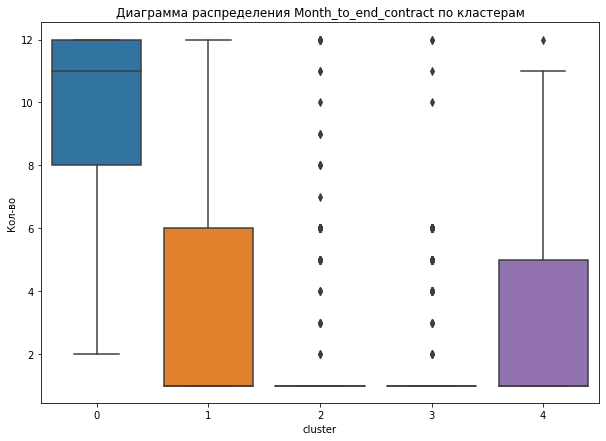

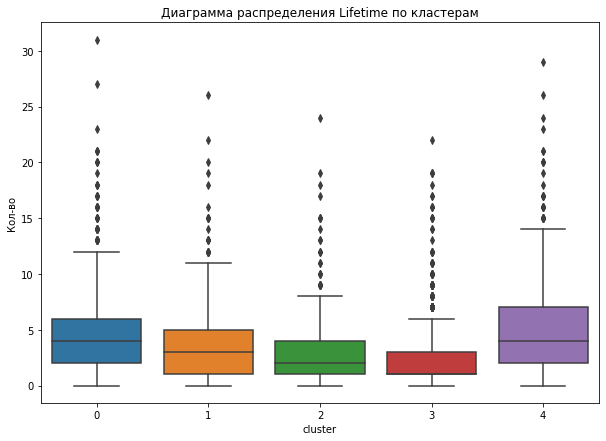

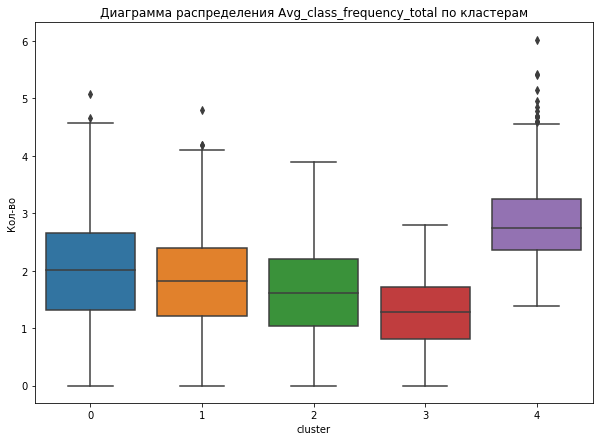

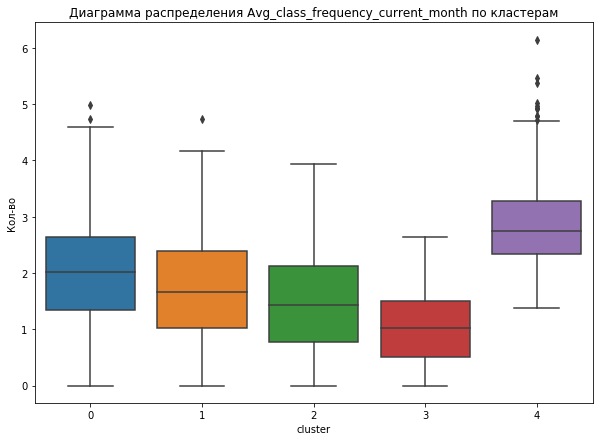

In [26]:
for element in box_plot:
    
    plt.figure(figsize=(10,7))
    sns.boxplot(x='cluster', y=element, data=df)
    
    plt.ylabel('Кол-во')
    plt.title('Диаграмма распределения {} по кластерам'.format(element))
    plt.show()

Приведенные выше диаграммы подтверждают определенные среднестатистические портреты клиентов, а также дают дополнительную информацию по кластерам:
* 0 - клиенты преимущественно имеют абонемент на 12 месяцев;
* 1 - клиенты могут иметь абонемент как на 1, 6, так и на 12 месяцев;
* 2, 3, 4 - преимущественно имеют абонемент на 1 месяц.

<a id='4.6'></a>

### 4.6 Посчитаем долю оттока для каждого кластера. 

In [27]:
df.groupby('cluster').agg({'Churn':'mean'})

,Churn
cluster,
0,0.027695
1,0.267532
2,0.443564
3,0.514263
4,0.068100


По оттоку кластеры можно характеризовать следующим образом:
* 0 и 1 кластеры самые надежные с точки зрения оттока. Отток за месяц не превышаем 3%
* 4 кластер надежный с точки зрения оттока. Отток за месяц 7%
* 2 и 3 кластеры самые ненадежные с точки зрения оттока. Отток достигает 51%

<a id='5c'></a>


# Итоговые выводы

Построено две модели для прогнозирования оттока клиентов (Логистическая регрессия и Случайный лес). Наилучшие результаты показала модель на основе логистической регрессии. Модели строились по предворительно отнормированным признакам.


### Портрет среднестатистического клиента
Мужчина или женщита в возрасте 29 лет, живет недалеко от фитнес-клуба и посещает его два раза в неделю, суммарная выручка фитнес-центра от других услуг по которому равна 147 руб.

### Все клиенты разбиты на 5 кластеров со следующим среднестатистическим профилем:
* 0 - Мужчина или женщина в возрасте 30 лет, живет недалеко от фитнес-клуба, сотрудник компании-партнера клуба, посещает его 2 раза в неделю, занимается 5 месяцев, имеют абонемент на 12 месяцев;
* 1 - Мужчина или женщина в возрасте 29 лет, живет недалеко от фитнес-клуба, телефон неизвестен, посещает его 2 раза в неделю, занимается 4 месяцев и могут иметь абонемент как на 1, 6, так и на 12 месяцев;
* 2 -  Мужчина или женщина в возрасте 28 лет, живет далеко от фитнес-клуба, посещает его 1-2 раза в неделю, занимается 3 месяца и преимущественно имеют абонемент на 1 месяц;
* 3 - Мужчина или женщина в возрасте 28 лет, живет недалеко от фитнес-клуба, посещает его 1 раз в неделю, занимается 2-3 месяца и преимущественно имеют абонемент на 1 месяц;
* 4 - Мужчина или женщина в возрасте 30 лет, живет недалеко от фитнес-клуба, посещает его 3 раза в неделю, занимается 5 месяцев и преимущественно имеют абонемент на 1 месяц.

### По оттоку кластеры можно характеризовать следующим образом:
* 0 и 1 кластеры самые надежные с точки зрения оттока. Отток за месяц не превышаем 3%
* 4 кластер надежный с точки зрения оттока. Отток за месяц 7%
* 2 и 3 кластеры самые ненадежные с точки зрения оттока. Отток достигает 51%

С точки зрения удержания клиентов надо больше всего внимания уделять наименее надежным с точки зрения оттока классам (3 и 4). Половина этих классов уходит на следующий месяц. Соответственно с целью их удержания необходимо организовывать двухмесячные мероприятия, которые будут способны их удержать как минимум на еще один дополнительный месяц. Также важно будет не упустить клиентов из 0, 1 и 2 кластера, когда у них закончиваются абонементы, т.к. если они возьмут следующий абонемент в другом зале, то это скорее всего будет безвозвратная потеря надежного и стабильного клиента.